In [1]:
import xarray as xr
import xradar
import cmweather

In [2]:
ds = xr.open_dataset('/Users/rjackson/mrr_data/0308.ave', engine='metek')

velocity_bins
range
transfer_function
spectral_reflectivity
drop_size
drop_number_density
time
percentage_valid_spectra
path_integrated_attenuation
corrected_radar_reflectivity
radar_reflectivity
rainfall_rate
liquid_water_content
velocity
spectrum_index
azimuth
elevation


In [3]:
ds

<xarray.Dataset> Size: 71MB
Dimensions:                       (sample: 64, time: 1440, range: 31,
                                   index: 44640)
Coordinates:
    velocity_bins                 (sample) float64 512B ...
  * range                         (range) float64 248B 150.0 300.0 ... 4.65e+03
  * time                          (time) datetime64[ns] 12kB 2024-03-08T00:00...
Dimensions without coordinates: sample, index
Data variables: (12/14)
    transfer_function             (time, range) float64 357kB ...
    spectral_reflectivity         (index, sample) float64 23MB ...
    drop_size                     (index, sample) float64 23MB ...
    drop_number_density           (index, sample) float64 23MB ...
    percentage_valid_spectra      (time) float64 12kB ...
    path_integrated_attenuation   (time, range) float64 357kB ...
    ...                            ...
    rainfall_rate                 (time, range) float64 357kB ...
    liquid_water_content          (time, range) float64 357kB ...
    velocity                      (time, range) float64 357kB ...
    spectrum_index                (time, range) float64 357kB ...
    azimuth                       (time) float64 12kB ...
    elevation                     (time) float64 12kB ...

## Plot MRR timeseries

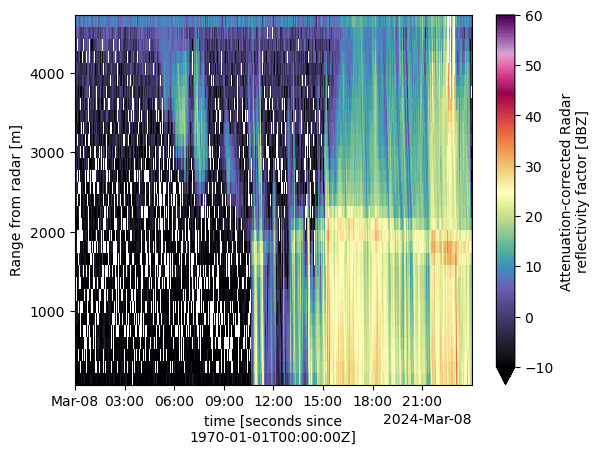

In [4]:
ds['corrected_radar_reflectivity'].T.plot(cmap='ChaseSpectral', vmin=-10, vmax=60)

## Plot MRR spectra

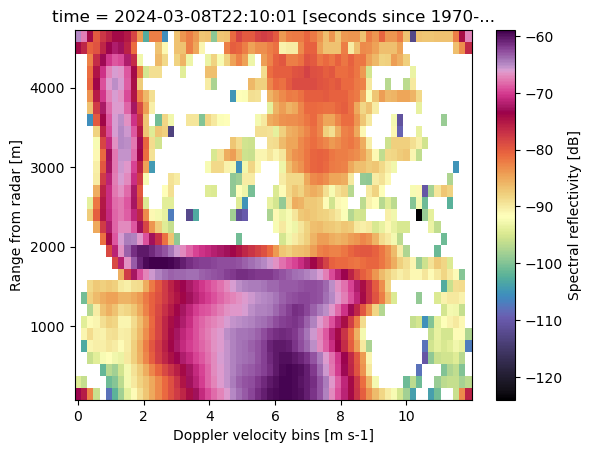

In [5]:
indicies = ds['spectrum_index'].sel(time='2024-03-08T22:10:00', method='nearest')
indicies
ds['spectral_reflectivity'].isel(index=indicies).T.plot(cmap='ChaseSpectral', x='velocity_bins')

In [16]:
ds['spectral_reflectivity'].isel(index=indicies)

<xarray.DataArray 'spectral_reflectivity' (range: 31, sample: 64)> Size: 16kB
[1984 values with dtype=float64]
Coordinates:
    velocity_bins  (sample) float64 512B ...
  * range          (range) float64 248B 150.0 300.0 450.0 ... 4.5e+03 4.65e+03
    time           datetime64[ns] 8B 2024-03-08T23:59:57
Dimensions without coordinates: sample
Attributes:
    long_name:      Spectral reflectivity
    standard_name:  equivalent_reflectivity_factor
    units:          dB